In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import os
os.environ['DATA_PATH'] = '/root/work/data'

In [2]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results


In [ ]:
from sklearn.datasets import make_swiss_roll
X, _ = make_swiss_roll(1000)

In [ ]:
k1 = 10
k2 = 20
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             X, mode='bootstrap', nb_iter=500, 
                             verbose=1, k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)
plt.hist(intdim_k_repeated.mean(axis=1))

In [5]:
from lasagnekit.datasets.mnist import MNIST
data = MNIST()
data.load()
X = data.X[0:1000]

100%|██████████| 100/100 [11:42<00:00,  6.98s/it]


(array([  1.,   4.,   5.,  12.,   9.,  16.,  23.,  12.,  16.,   2.]),
 array([ 10.76534854,  10.84003062,  10.9147127 ,  10.98939478,
         11.06407686,  11.13875894,  11.21344102,  11.2881231 ,
         11.36280518,  11.43748725,  11.51216933]),
 <a list of 10 Patch objects>)

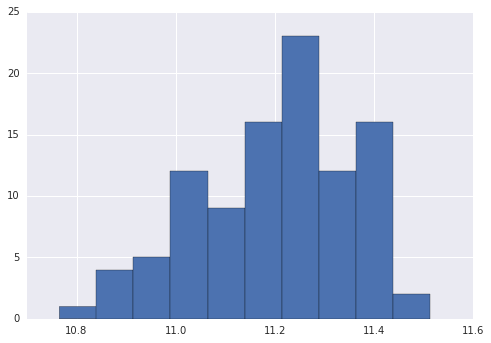

In [6]:
k1 = 10
k2 = 20
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             X, mode='bootstrap', nb_iter=100, 
                             verbose=1, k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)
plt.hist(intdim_k_repeated.mean(axis=1))